# Topic Modeling #

Gensim-based functions:

Load functions from 'topics.py'.

In [1]:
import topics as tp

Tell jupyter to draw figures within the browser.

In [2]:
%matplotlib inline

Read text files from a folder.

In [3]:
folder = './corpus/*.txt'
documents = tp.readCorpus(folder)

Store the file names as document labels in a separate list.

In [4]:
doc_labels = tp.docLabels(folder)
doc_labels

['Kipling_TheEndofthePassage',
 'Howard_TheDevilinIron',
 'Poe_TheMasqueoftheRedDeath',
 'Doyle_AScandalinBohemia',
 'Doyle_AStudyinScarlet',
 'Kipling_ThyServantaDog',
 'Poe_TheCaskofAmontillado',
 'Howard_ShadowsintheMoonlight',
 'Howard_GodsoftheNorth',
 'Howard_SchadowsinZamboula',
 'Doyle_TheSignoftheFour',
 'Lovecraft_AttheMountainofMadness',
 'Poe_ThePurloinedLetter',
 'Lovecraft_TheShunnedHouse',
 'Poe_EurekaAProsePoem',
 'Kipling_TheJungleBook',
 'Doyle_TheHoundoftheBaskervilles']

### Preprocessing ###

Tokenize texts.

In [5]:
texts = tp.tokenize(documents)

Remove hapax legomena.

In [6]:
texts = tp.removeHapaxLeg(texts)

Remove stopwords.

In [7]:
texts = tp.removeStopWords(texts, stoplist = 'en')

### Model creation ###

In [8]:
from gensim import corpora, models
# Specify number of topics
no_of_topics = 10
# Generate dictionary object
dictionary = corpora.Dictionary(texts)
# Generate corpus object
corpus = [dictionary.doc2bow(text) for text in texts]
# Generate model object
model = models.LdaModel(corpus,
    id2word = dictionary,
    num_topics = no_of_topics,
    passes = 10
    )

Create labels for topics from gensim model.

In [9]:
topic_labels = tp.topicLabels(model, no_of_topics)

Show topics with build-in gensim function.

In [10]:
model.show_topics(num_topics = 5)

[(5,
  '0.001*said + 0.001*s + 0.001*man + 0.000*like + 0.000*little + 0.000*came + 0.000*time + 0.000*great + 0.000*t + 0.000*come'),
 (4,
  '0.006*atoms + 0.005*centre + 0.005*let + 0.005*say + 0.005*point + 0.005*matter + 0.005*sun + 0.004*idea + 0.004*universe + 0.004*s'),
 (2,
  '0.007*s + 0.005*lake + 0.005*great + 0.004*old + 0.004*ones + 0.003*city + 0.003*camp + 0.003*did + 0.003*feet + 0.003*land'),
 (6,
  '0.019*conan + 0.008*s + 0.006*like + 0.005*door + 0.004*eyes + 0.004*man + 0.004*great + 0.004*saw + 0.004*girl + 0.003*sword'),
 (7,
  '0.003*s + 0.002*said + 0.001*did + 0.001*old + 0.001*like + 0.001*long + 0.001*came + 0.001*time + 0.001*great + 0.001*come')]

Save gensim output.

In [11]:
tp.saveGensimModel(model, corpus, dictionary, no_of_topics, doc_labels)

saving ...



### The document-topic matrix ###
Create a doc-topic matrix from the gensim objects.

In [12]:
doc_topic = tp.gensim_to_dtm(model, corpus, no_of_topics)

### Document-topic heatmap ###

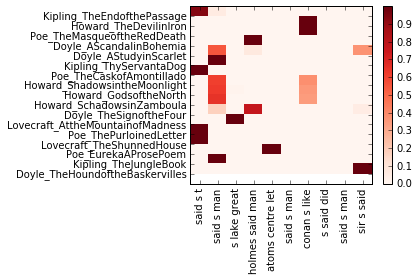

In [13]:
tp.docTopHeatmap(doc_topic, doc_labels, topic_labels)

In [14]:
import gensim
help(gensim)

Help on package gensim:

NAME
    gensim

DESCRIPTION
    This package contains interfaces and functionality to compute pair-wise document
    similarities within a corpus of documents.

PACKAGE CONTENTS
    corpora (package)
    interfaces
    matutils
    models (package)
    nosy
    parsing (package)
    scripts (package)
    similarities (package)
    summarization (package)
    test (package)
    utils

CLASSES
    logging.Handler(logging.Filterer)
        NullHandler
    
    class NullHandler(logging.Handler)
     |  For python versions <= 2.6; same as `logging.NullHandler` in 2.7.
     |  
     |  Method resolution order:
     |      NullHandler
     |      logging.Handler
     |      logging.Filterer
     |      builtins.object
     |  
     |  Methods defined here:
     |  
     |  emit(self, record)
     |  
     |  ----------------------------------------------------------------------
     |  Methods inherited from logging.Handler:
     |  
     |  __init__(self, level=0)


In [15]:
import matplotlib
help(matplotlib)

Help on package matplotlib:

NAME
    matplotlib - This is an object-oriented plotting library.

DESCRIPTION
    A procedural interface is provided by the companion pyplot module,
    which may be imported directly, e.g.::
    
        import matplotlib.pyplot as plt
    
    or using ipython::
    
        ipython
    
    at your terminal, followed by::
    
        In [1]: %matplotlib
        In [2]: import matplotlib.pyplot as plt
    
    at the ipython shell prompt.
    
    For the most part, direct use of the object-oriented library is
    encouraged when programming; pyplot is primarily for working
    interactively.  The
    exceptions are the pyplot commands :func:`~matplotlib.pyplot.figure`,
    :func:`~matplotlib.pyplot.subplot`,
    :func:`~matplotlib.pyplot.subplots`, and
    :func:`~pyplot.savefig`, which can greatly simplify scripting.
    
    Modules include:
    
        :mod:`matplotlib.axes`
            defines the :class:`~matplotlib.axes.Axes` class.  Most pylab